<a href="https://colab.research.google.com/github/bognix/Machin-Learning-for-Everybody/blob/main/machine_learning_for_everybody_magic4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df["class"] = (df["class"] == "g").astype(int)

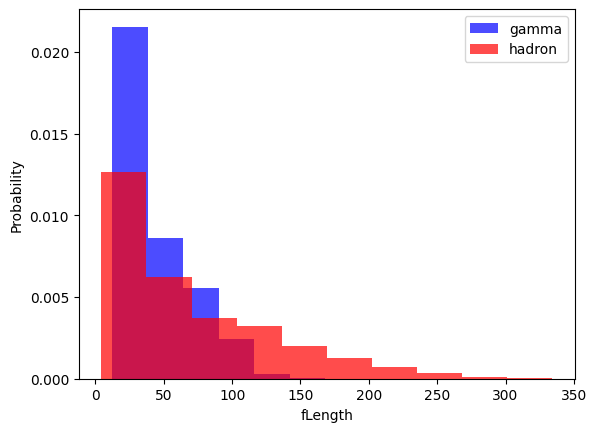

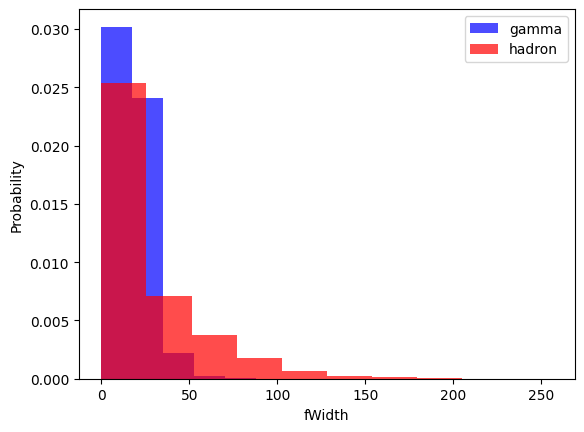

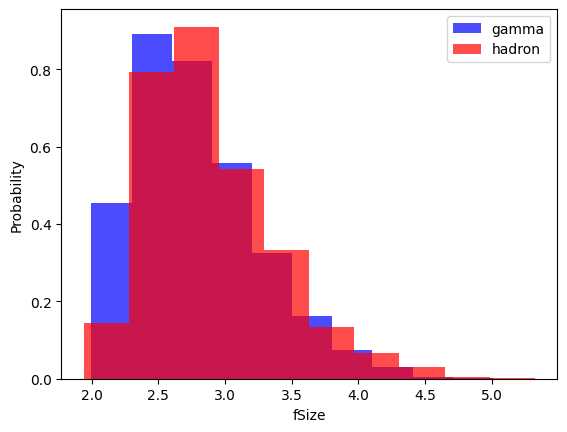

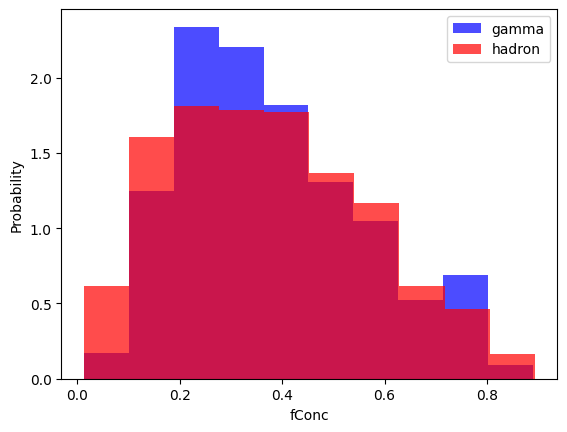

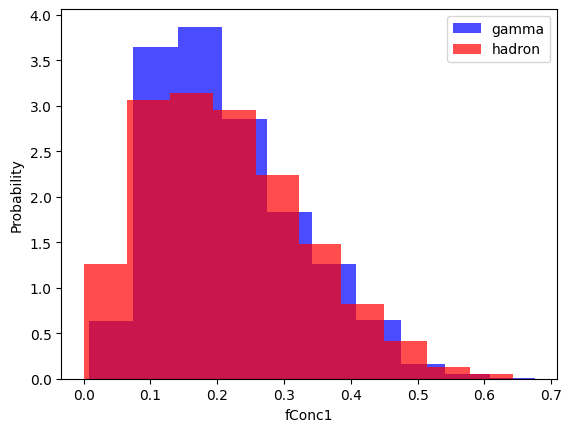

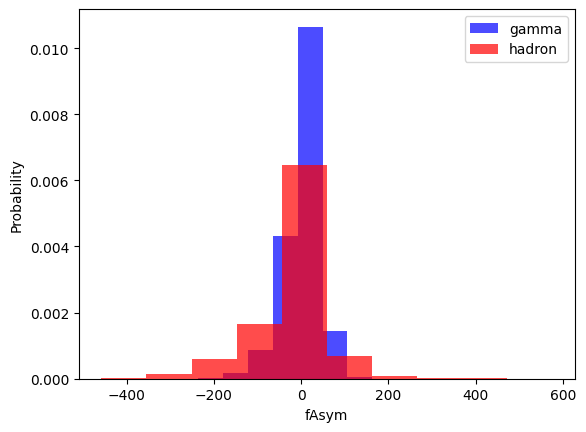

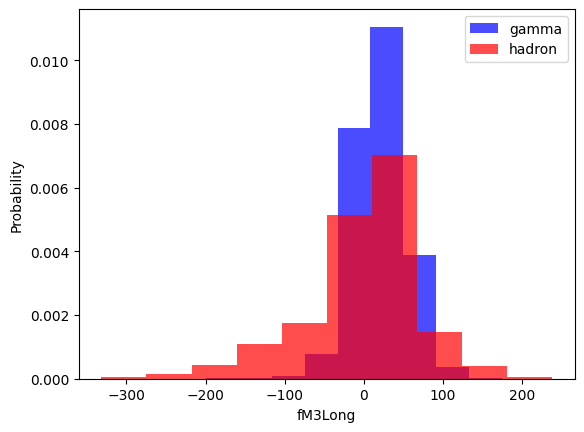

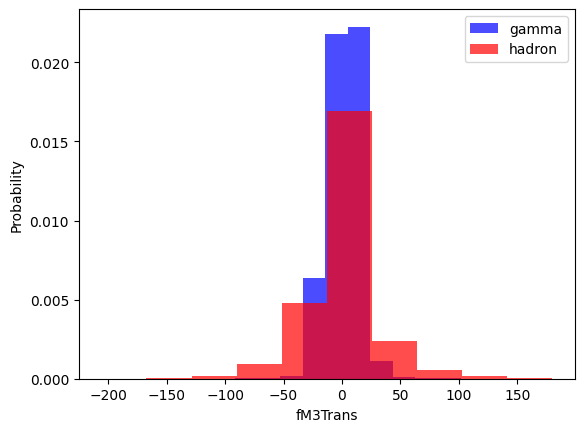

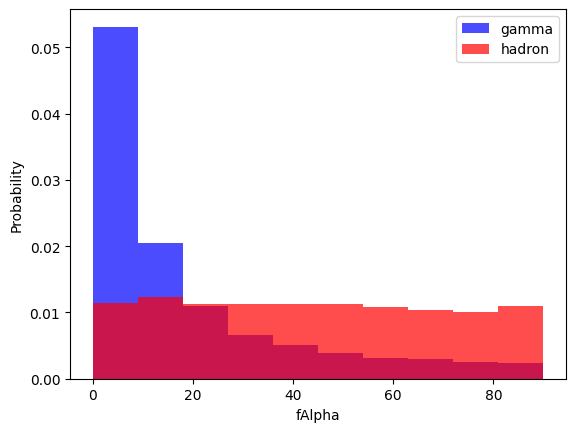

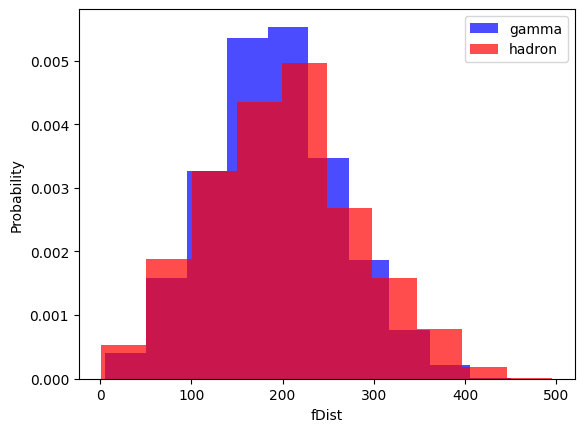

In [3]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color="blue", label="gamma", alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color="red", label="hadron", alpha=0.7, density=True)
  plt.title = label
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

## Create training, validation and test data sets

In [4]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [5]:
test_y = df[df.columns[-1]].values
print(np.reshape(test_y, (-1, 1)))

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [6]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [7]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

## K-Nearest Neighbours

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [9]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
y_pred = knn_model.predict(X_test)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1316
           1       0.86      0.86      0.86      2488

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



## Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [14]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.41      0.51      1316
           1       0.74      0.89      0.81      2488

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.70      1316
           1       0.85      0.82      0.83      2488

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



## SVM

In [17]:
from sklearn.svm import SVC

In [18]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1316
           1       0.90      0.88      0.89      2488

    accuracy                           0.86      3804
   macro avg       0.84      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



In [19]:
import tensorflow as tf

In [20]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [21]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


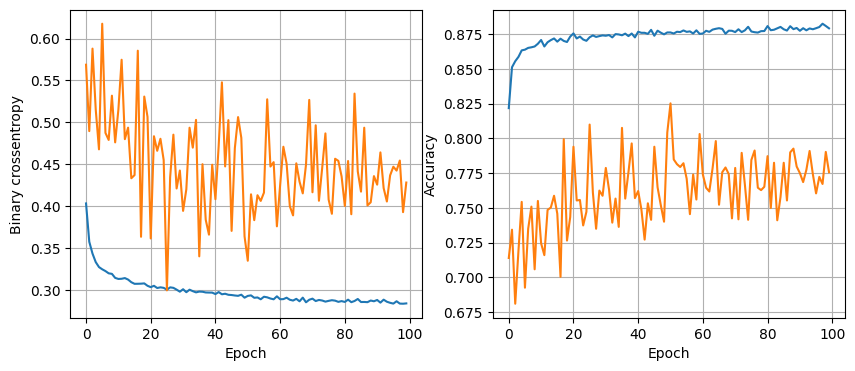

119/119 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.8696
16 nodes, dropout 0, lr 0.01, batch size 64


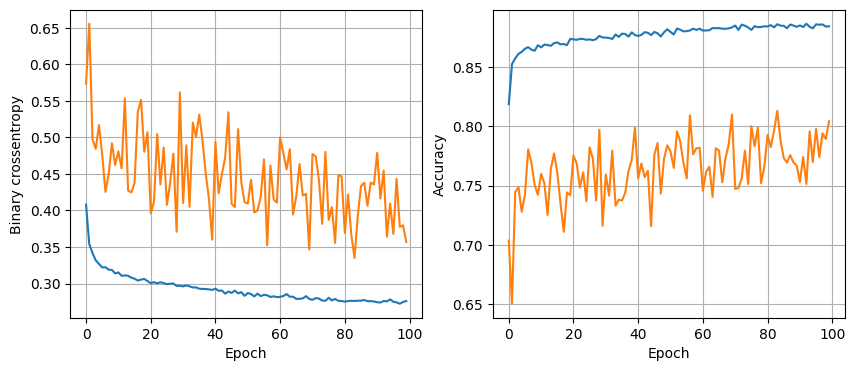

119/119 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 0.8759
16 nodes, dropout 0, lr 0.01, batch size 128


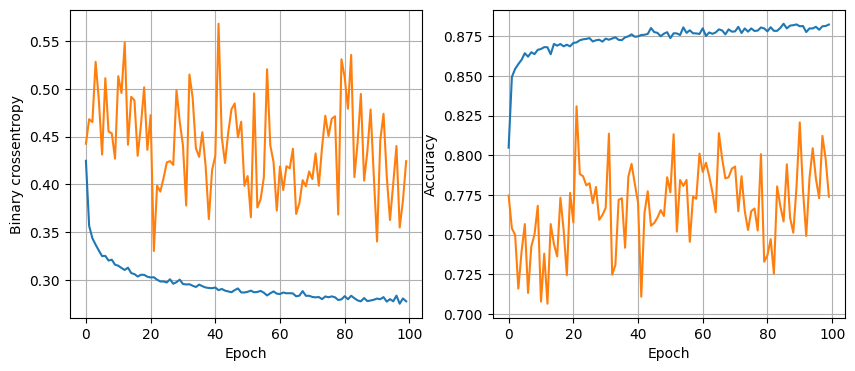

119/119 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.8733
16 nodes, dropout 0, lr 0.005, batch size 32


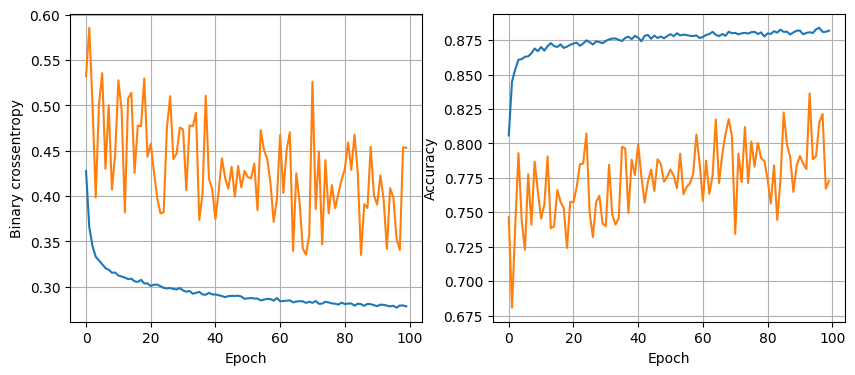

119/119 [==============================] - 0s 2ms/step - loss: 0.3147 - accuracy: 0.8728
16 nodes, dropout 0, lr 0.005, batch size 64


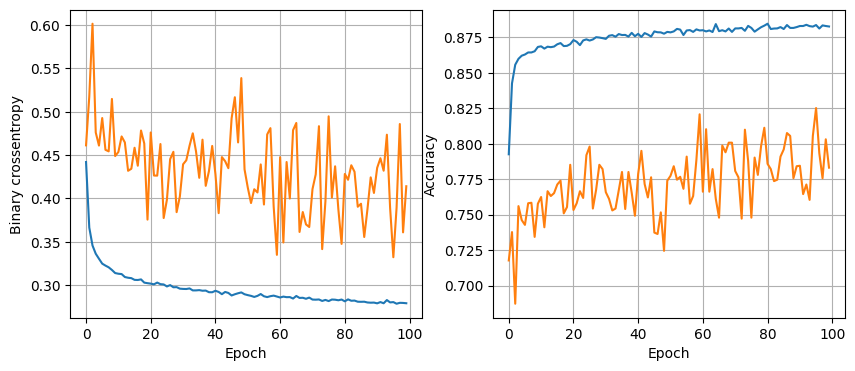

119/119 [==============================] - 0s 2ms/step - loss: 0.3189 - accuracy: 0.8696
16 nodes, dropout 0, lr 0.005, batch size 128


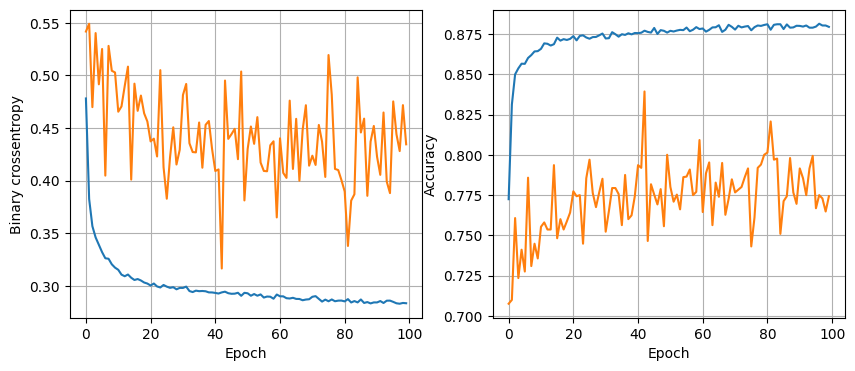

119/119 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.8751
16 nodes, dropout 0, lr 0.001, batch size 32


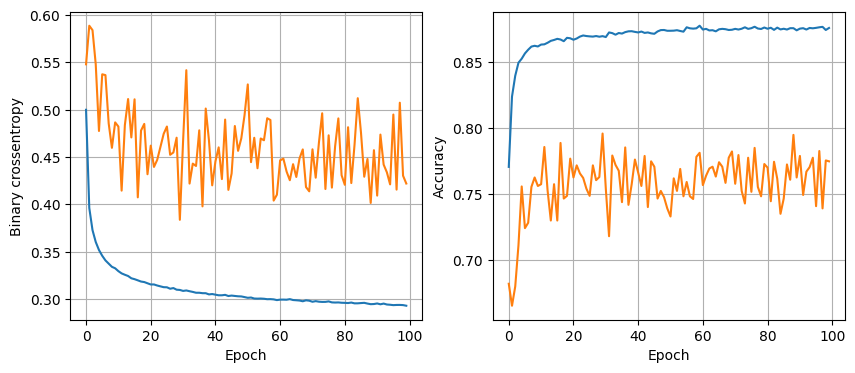

119/119 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8709
16 nodes, dropout 0, lr 0.001, batch size 64


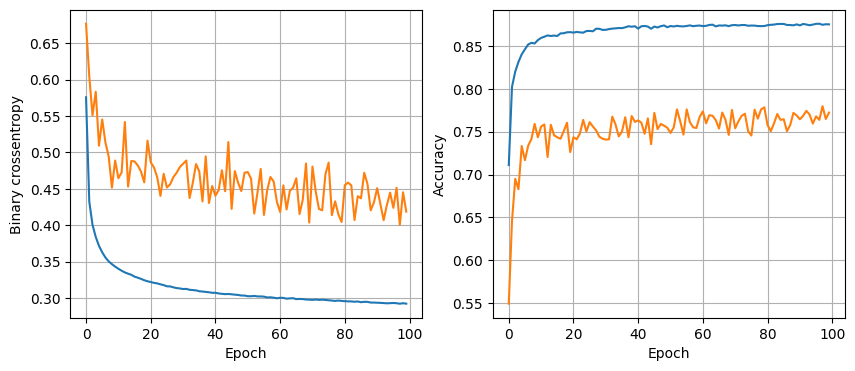

119/119 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.8686
16 nodes, dropout 0, lr 0.001, batch size 128


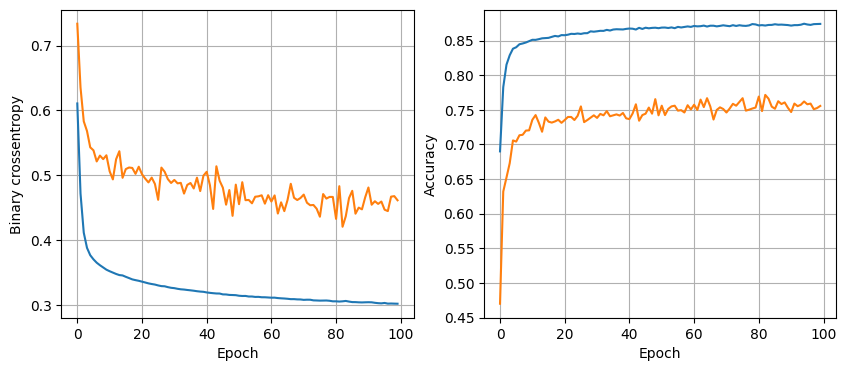

119/119 [==============================] - 0s 2ms/step - loss: 0.3185 - accuracy: 0.8680
16 nodes, dropout 0.2, lr 0.01, batch size 32


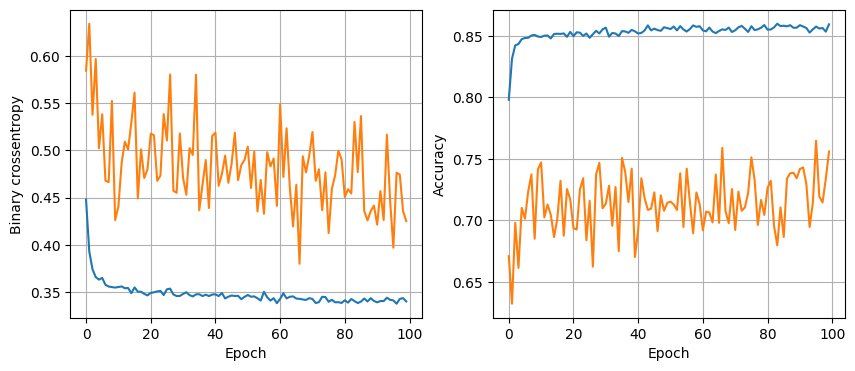

119/119 [==============================] - 0s 2ms/step - loss: 0.3289 - accuracy: 0.8680
16 nodes, dropout 0.2, lr 0.01, batch size 64


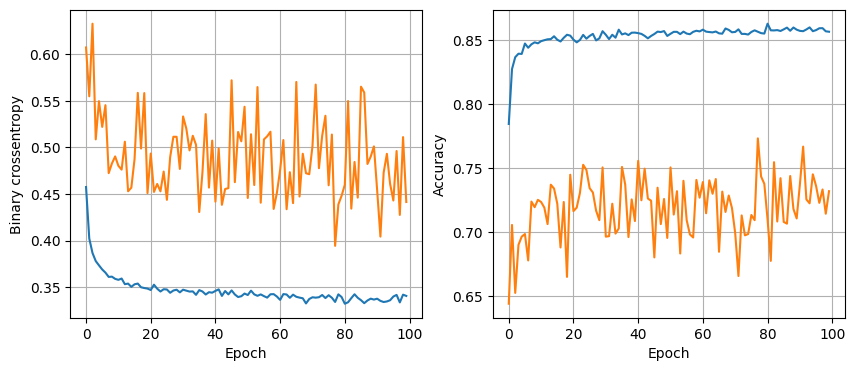

119/119 [==============================] - 0s 3ms/step - loss: 0.3187 - accuracy: 0.8730
16 nodes, dropout 0.2, lr 0.01, batch size 128


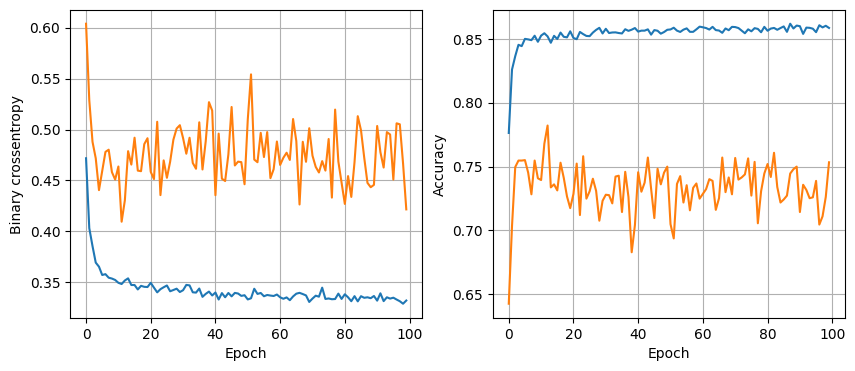

119/119 [==============================] - 0s 3ms/step - loss: 0.3169 - accuracy: 0.8720
16 nodes, dropout 0.2, lr 0.005, batch size 32


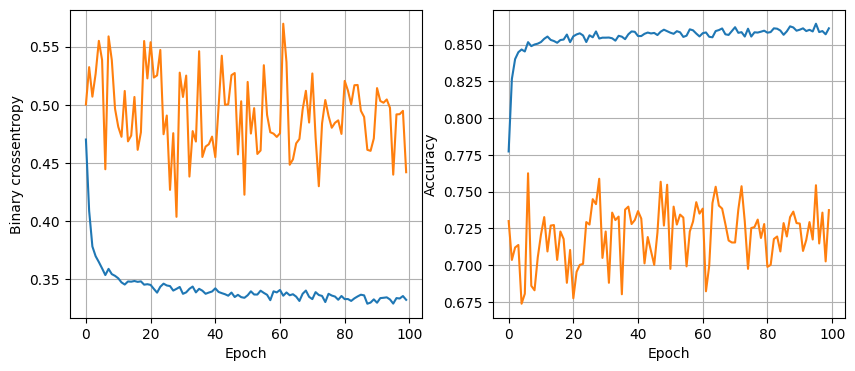

119/119 [==============================] - 0s 3ms/step - loss: 0.3162 - accuracy: 0.8722
16 nodes, dropout 0.2, lr 0.005, batch size 64


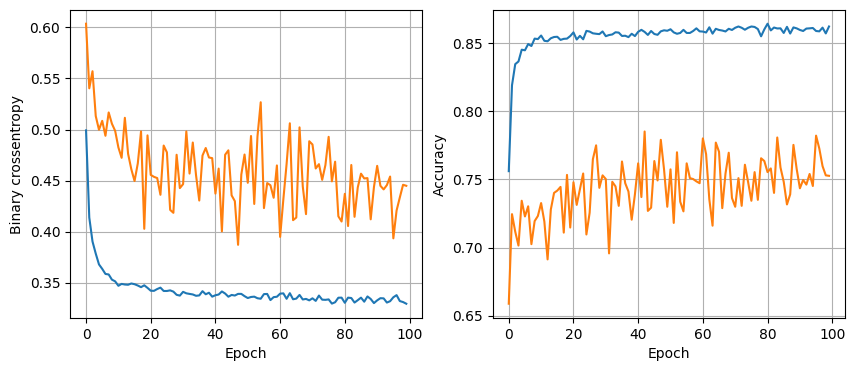

119/119 [==============================] - 0s 2ms/step - loss: 0.3130 - accuracy: 0.8699
16 nodes, dropout 0.2, lr 0.005, batch size 128


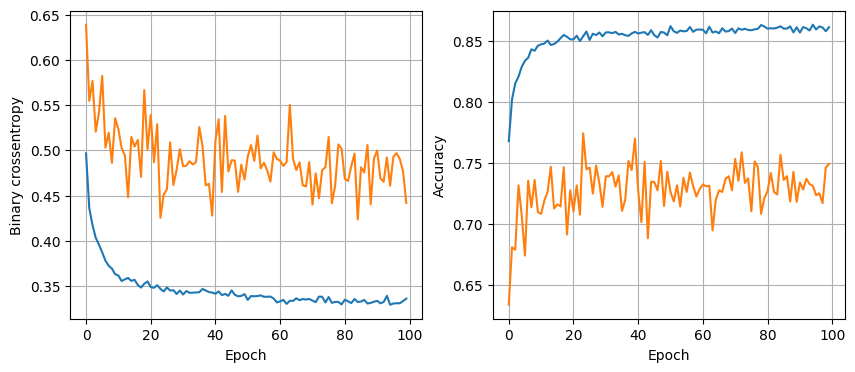

119/119 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.8725
16 nodes, dropout 0.2, lr 0.001, batch size 32


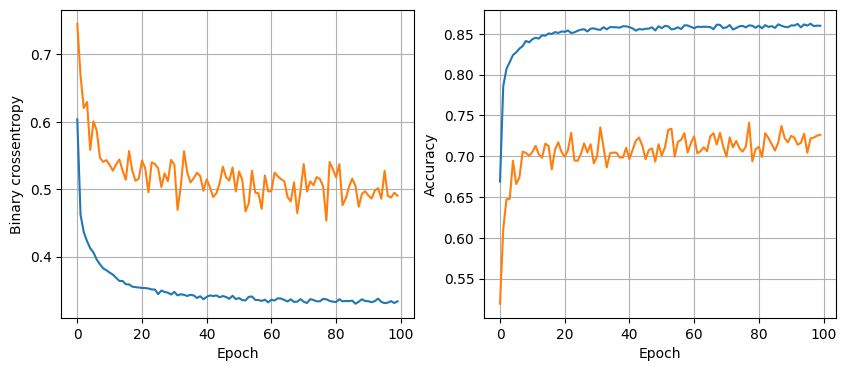

119/119 [==============================] - 0s 2ms/step - loss: 0.3123 - accuracy: 0.8657
16 nodes, dropout 0.2, lr 0.001, batch size 64


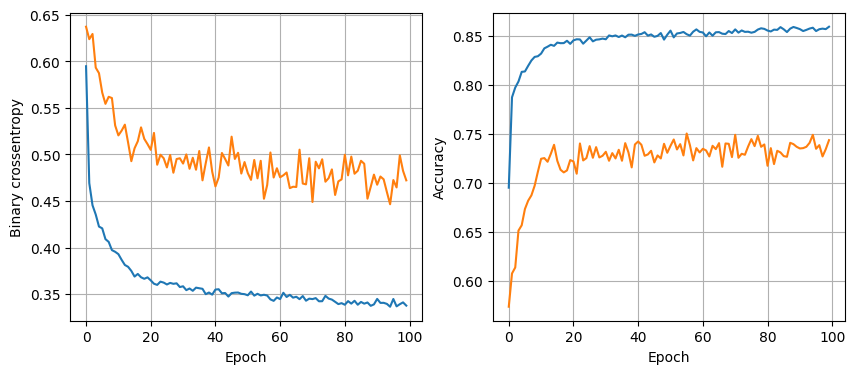

119/119 [==============================] - 0s 2ms/step - loss: 0.3162 - accuracy: 0.8665
16 nodes, dropout 0.2, lr 0.001, batch size 128


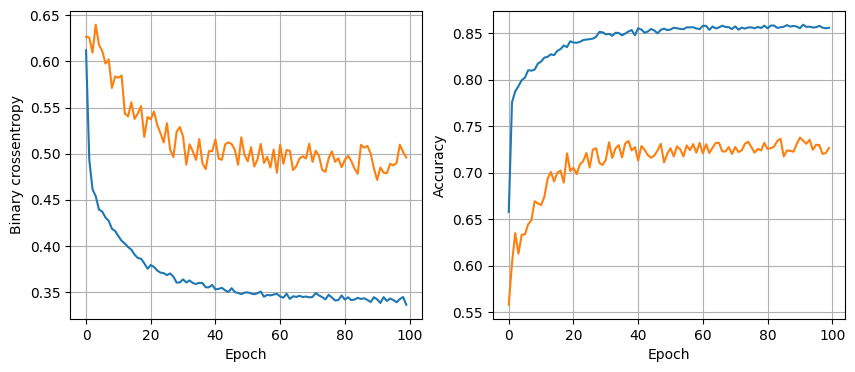

119/119 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8657
32 nodes, dropout 0, lr 0.01, batch size 32


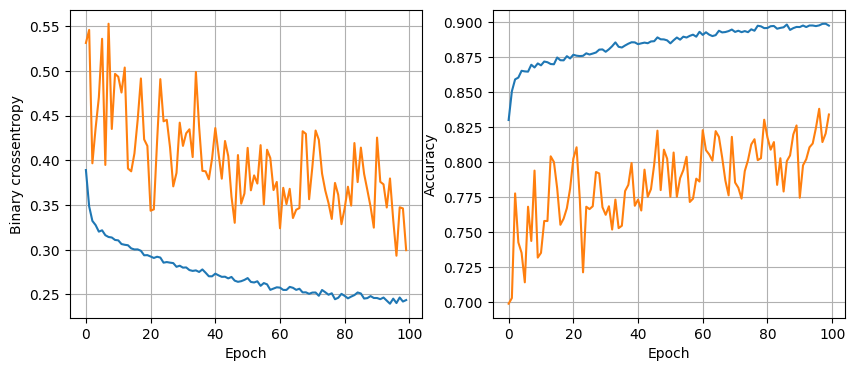

119/119 [==============================] - 0s 2ms/step - loss: 0.3959 - accuracy: 0.8630
32 nodes, dropout 0, lr 0.01, batch size 64


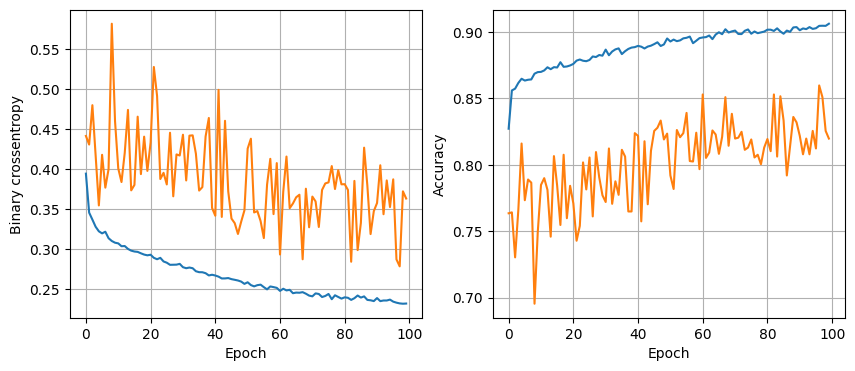

119/119 [==============================] - 0s 2ms/step - loss: 0.3785 - accuracy: 0.8675
32 nodes, dropout 0, lr 0.01, batch size 128


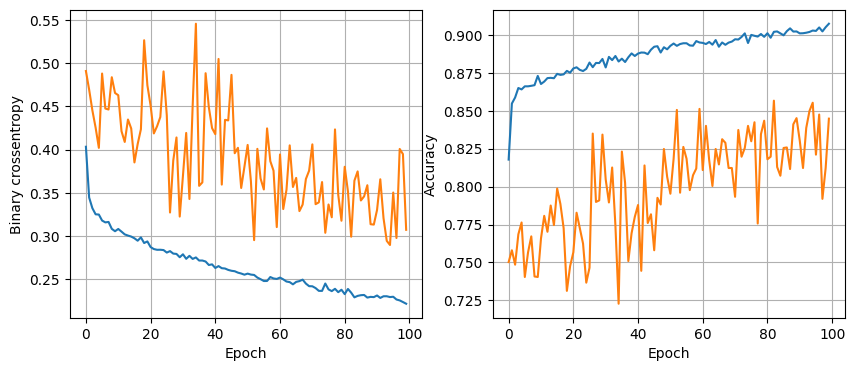

119/119 [==============================] - 0s 3ms/step - loss: 0.4014 - accuracy: 0.8567
32 nodes, dropout 0, lr 0.005, batch size 32


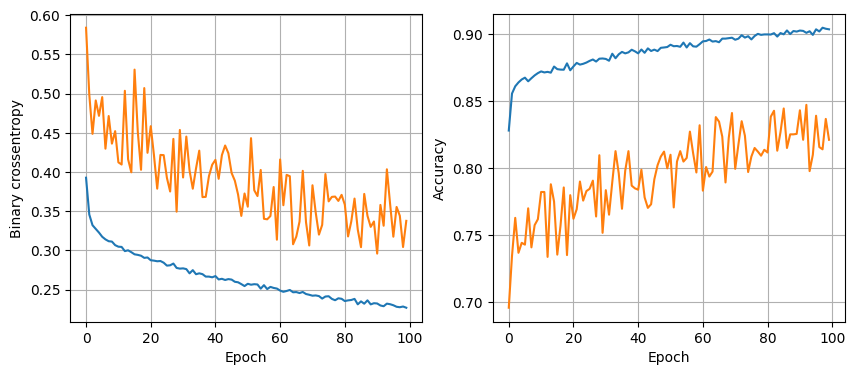

119/119 [==============================] - 0s 3ms/step - loss: 0.3716 - accuracy: 0.8699
32 nodes, dropout 0, lr 0.005, batch size 64


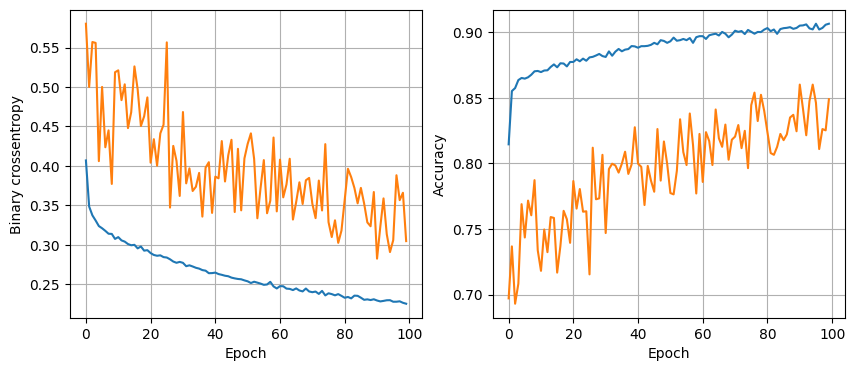

119/119 [==============================] - 0s 2ms/step - loss: 0.3782 - accuracy: 0.8609
32 nodes, dropout 0, lr 0.005, batch size 128


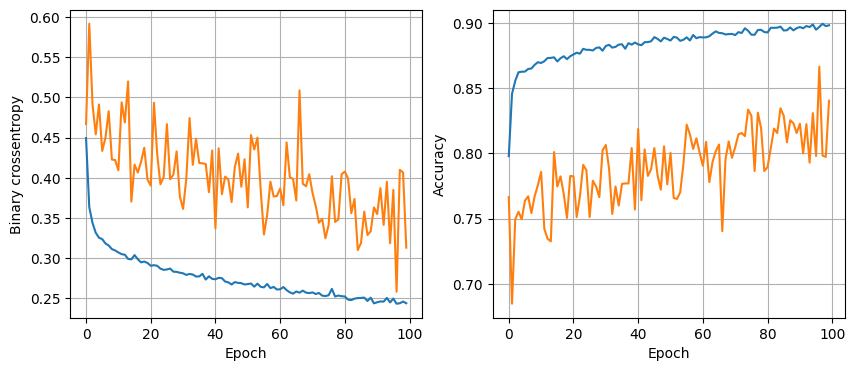

119/119 [==============================] - 0s 2ms/step - loss: 0.3453 - accuracy: 0.8630
32 nodes, dropout 0, lr 0.001, batch size 32


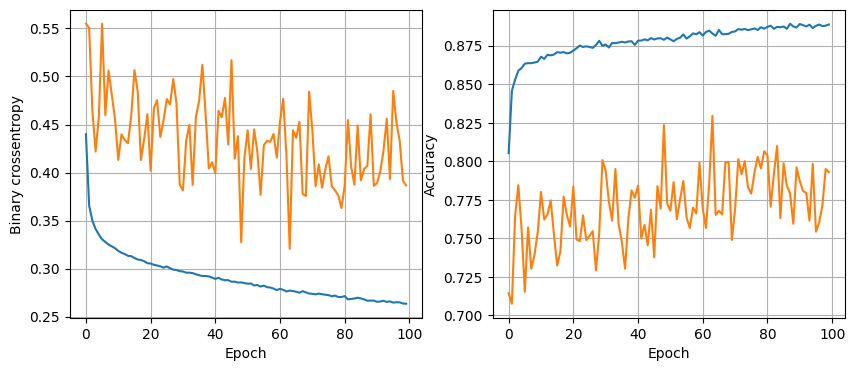

119/119 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.8709
32 nodes, dropout 0, lr 0.001, batch size 64


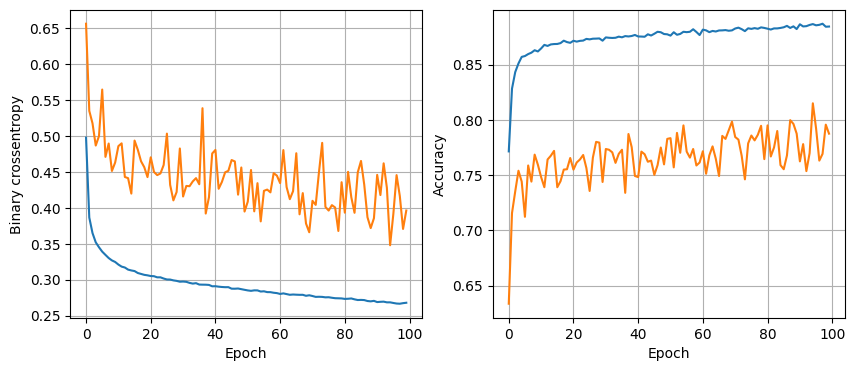

119/119 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8701
32 nodes, dropout 0, lr 0.001, batch size 128


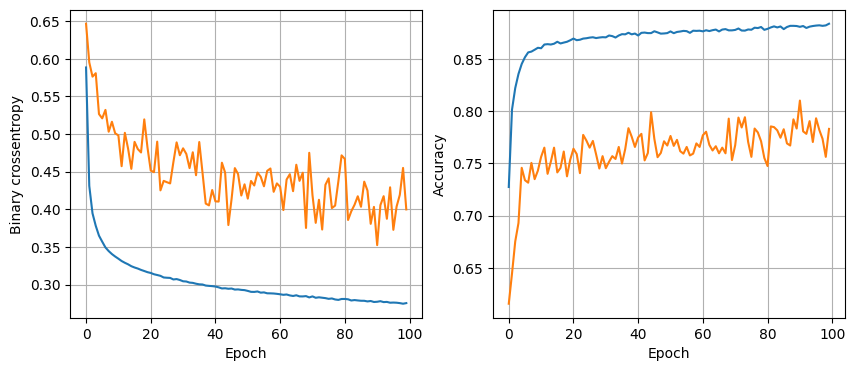

119/119 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.8757
32 nodes, dropout 0.2, lr 0.01, batch size 32


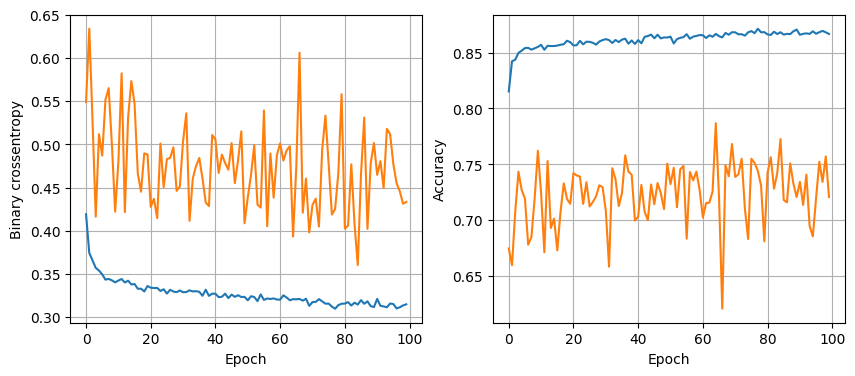

119/119 [==============================] - 0s 2ms/step - loss: 0.3104 - accuracy: 0.8707
32 nodes, dropout 0.2, lr 0.01, batch size 64


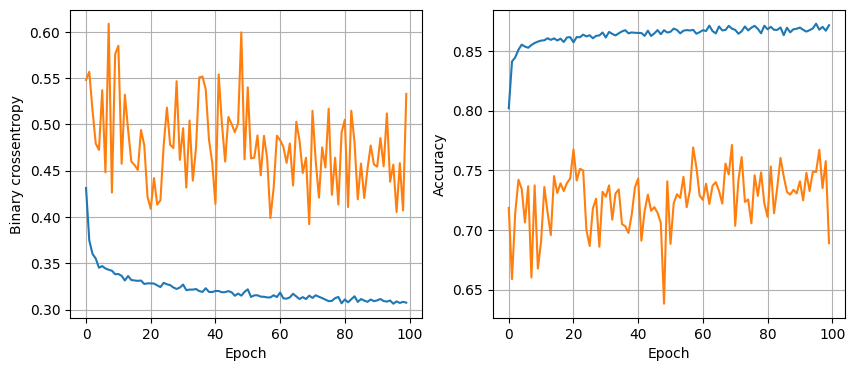

119/119 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.8712
32 nodes, dropout 0.2, lr 0.01, batch size 128


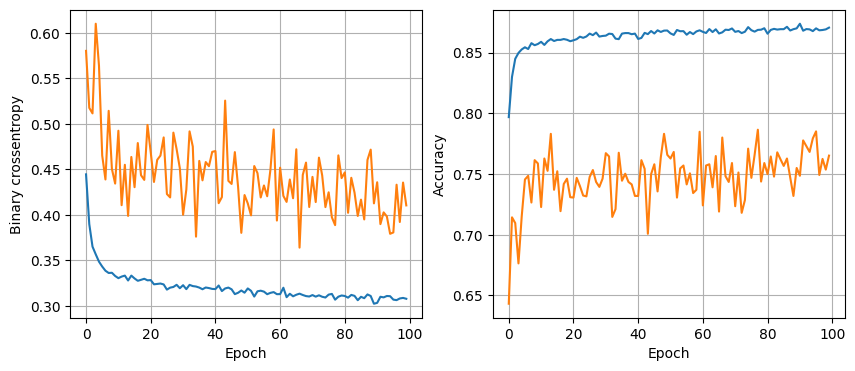

119/119 [==============================] - 0s 2ms/step - loss: 0.3139 - accuracy: 0.8741
32 nodes, dropout 0.2, lr 0.005, batch size 32


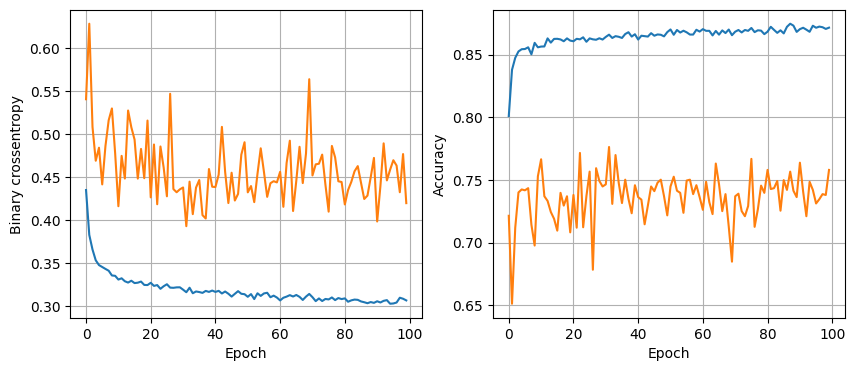

119/119 [==============================] - 0s 2ms/step - loss: 0.3004 - accuracy: 0.8817
32 nodes, dropout 0.2, lr 0.005, batch size 64


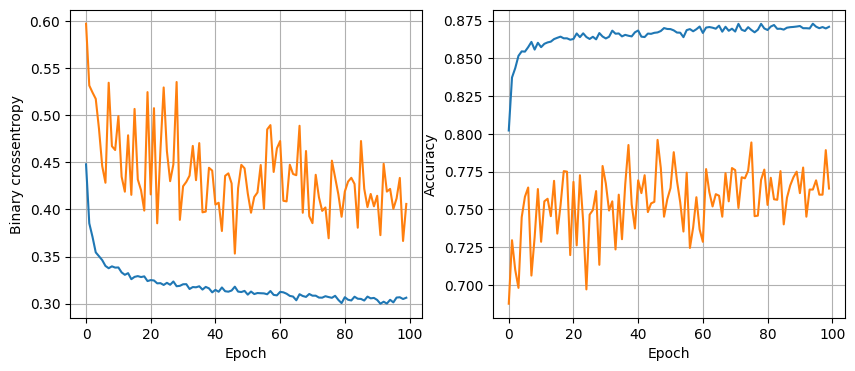

119/119 [==============================] - 0s 3ms/step - loss: 0.3026 - accuracy: 0.8828
32 nodes, dropout 0.2, lr 0.005, batch size 128


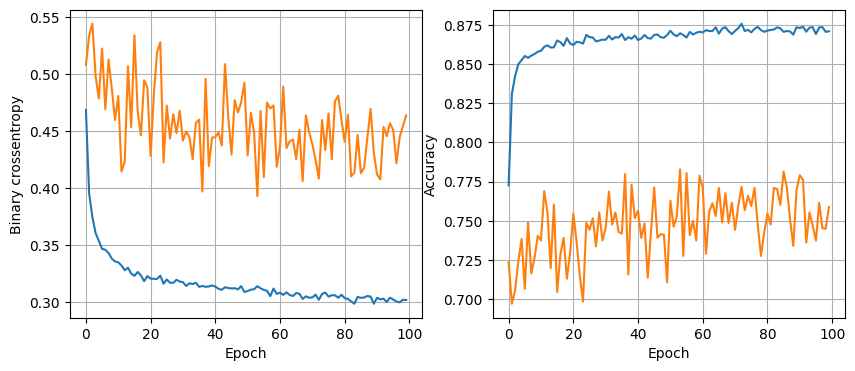

119/119 [==============================] - 0s 2ms/step - loss: 0.3000 - accuracy: 0.8788
32 nodes, dropout 0.2, lr 0.001, batch size 32


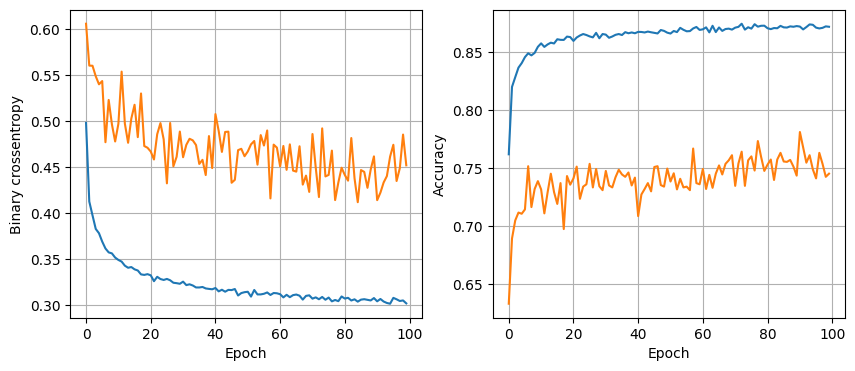

119/119 [==============================] - 0s 2ms/step - loss: 0.2986 - accuracy: 0.8764
32 nodes, dropout 0.2, lr 0.001, batch size 64


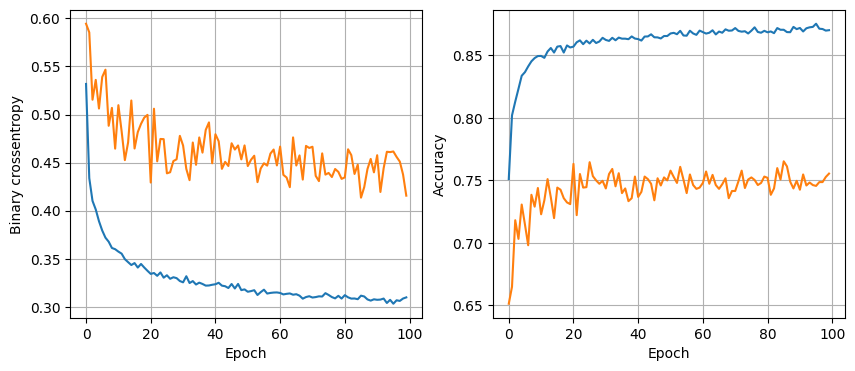

119/119 [==============================] - 0s 2ms/step - loss: 0.3070 - accuracy: 0.8743
32 nodes, dropout 0.2, lr 0.001, batch size 128


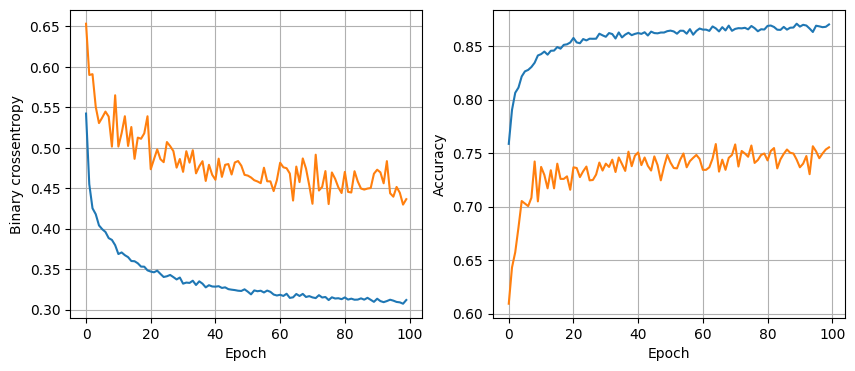

119/119 [==============================] - 0s 2ms/step - loss: 0.3064 - accuracy: 0.8709
64 nodes, dropout 0, lr 0.01, batch size 32


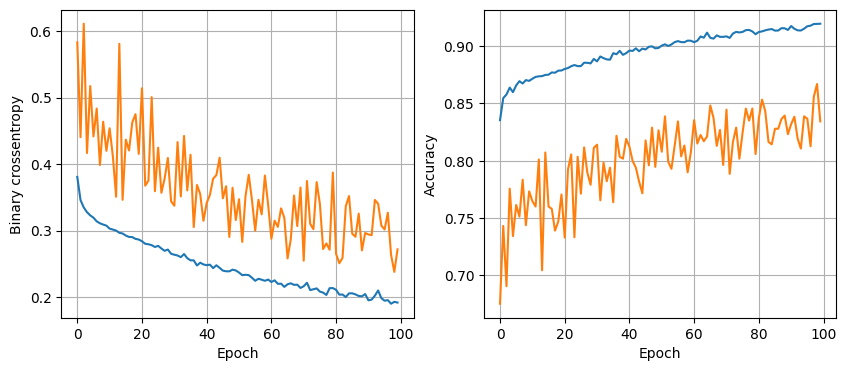

119/119 [==============================] - 0s 2ms/step - loss: 0.5209 - accuracy: 0.8554
64 nodes, dropout 0, lr 0.01, batch size 64


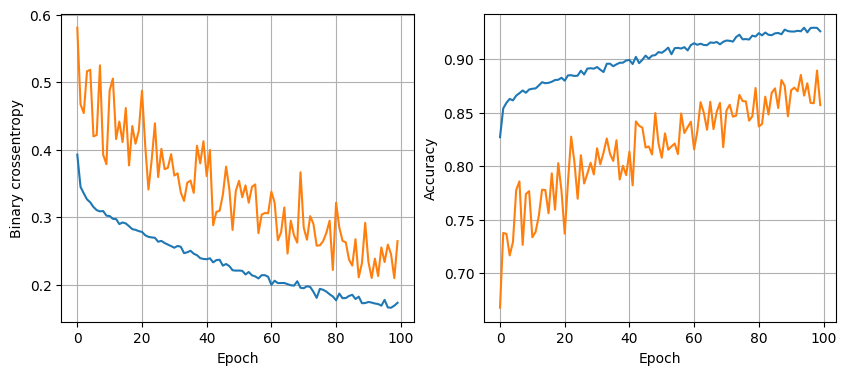

119/119 [==============================] - 0s 3ms/step - loss: 0.5539 - accuracy: 0.8586
64 nodes, dropout 0, lr 0.01, batch size 128


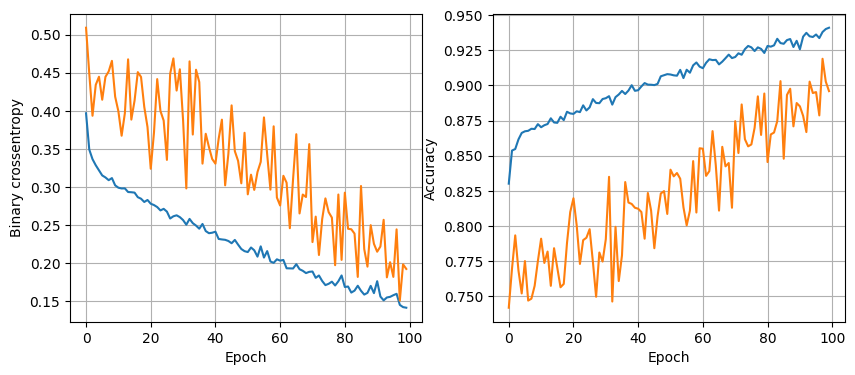

119/119 [==============================] - 0s 3ms/step - loss: 0.6206 - accuracy: 0.8636
64 nodes, dropout 0, lr 0.005, batch size 32


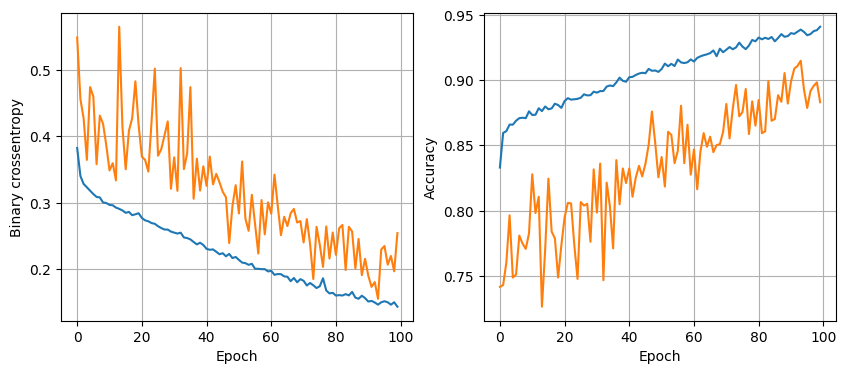

119/119 [==============================] - 0s 2ms/step - loss: 0.6403 - accuracy: 0.8536
64 nodes, dropout 0, lr 0.005, batch size 64


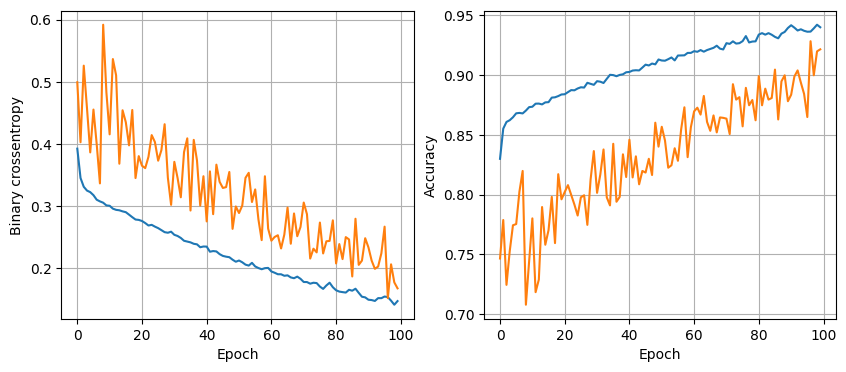

119/119 [==============================] - 0s 2ms/step - loss: 0.6158 - accuracy: 0.8496
64 nodes, dropout 0, lr 0.005, batch size 128


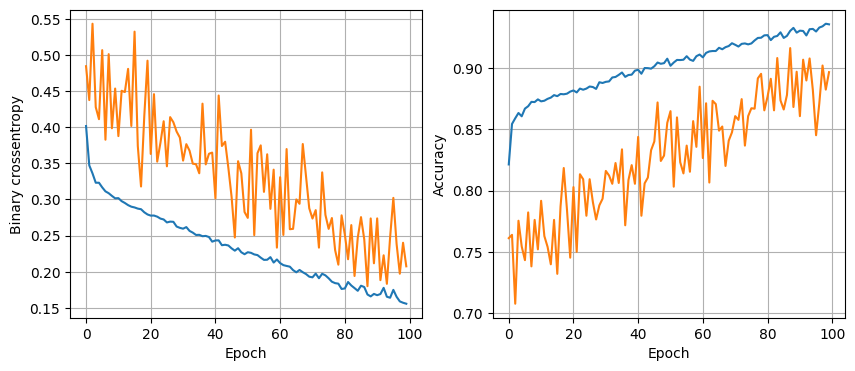

119/119 [==============================] - 0s 2ms/step - loss: 0.4914 - accuracy: 0.8591
64 nodes, dropout 0, lr 0.001, batch size 32


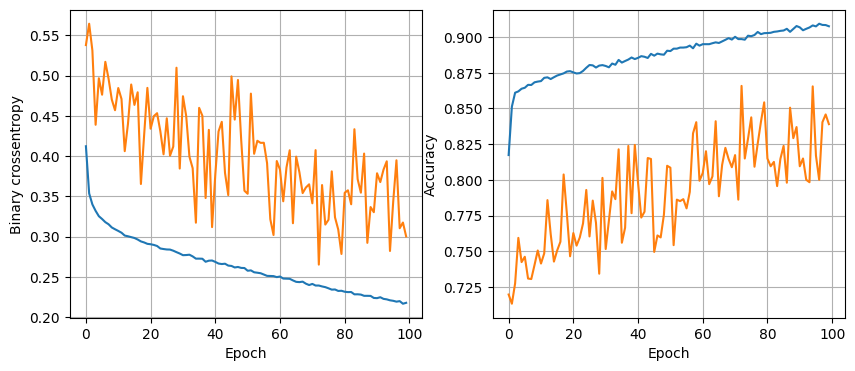

119/119 [==============================] - 0s 2ms/step - loss: 0.3529 - accuracy: 0.8693
64 nodes, dropout 0, lr 0.001, batch size 64


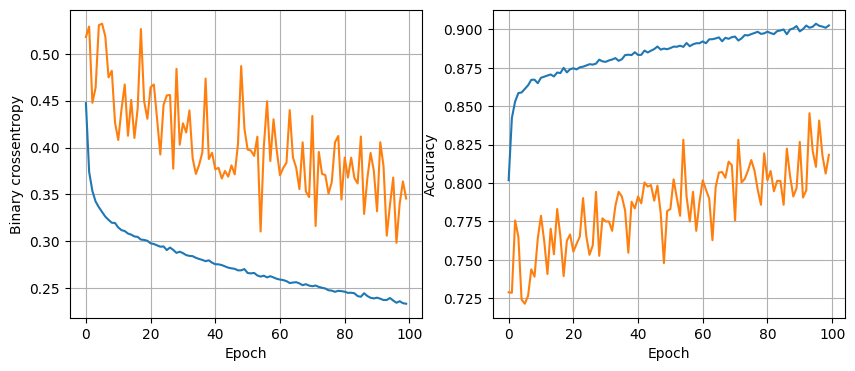

119/119 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.8691
64 nodes, dropout 0, lr 0.001, batch size 128


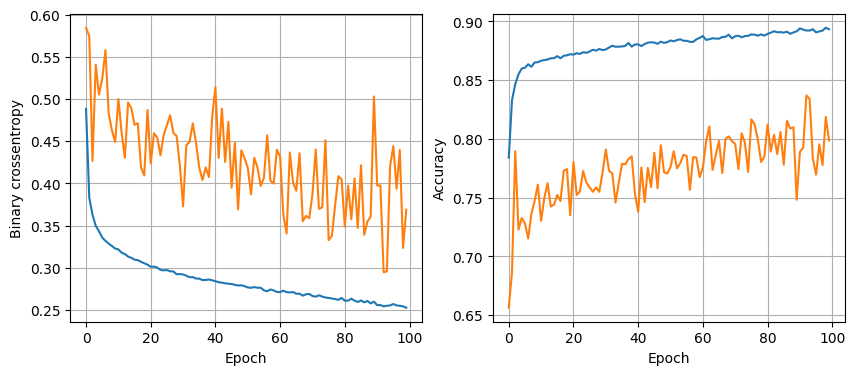

119/119 [==============================] - 0s 3ms/step - loss: 0.3096 - accuracy: 0.8767
64 nodes, dropout 0.2, lr 0.01, batch size 32


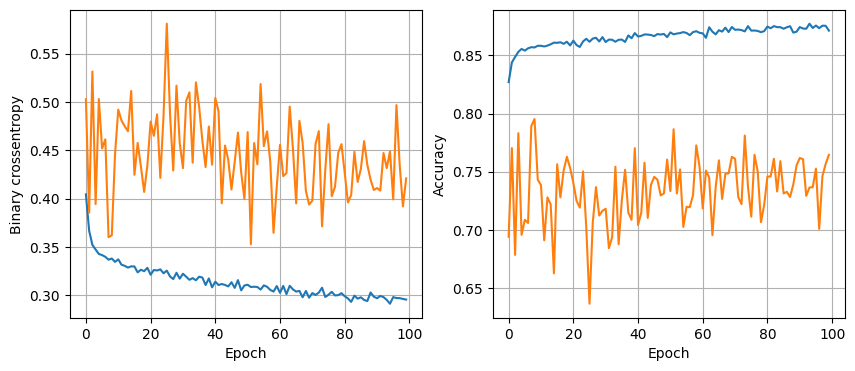

119/119 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.8780
64 nodes, dropout 0.2, lr 0.01, batch size 64


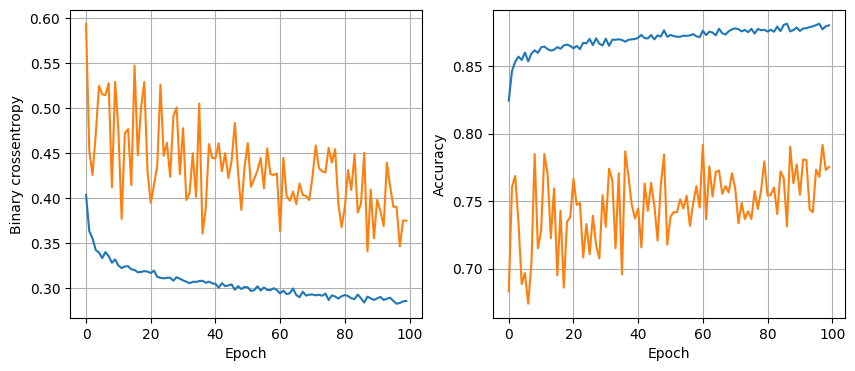

119/119 [==============================] - 0s 3ms/step - loss: 0.3205 - accuracy: 0.8754
64 nodes, dropout 0.2, lr 0.01, batch size 128


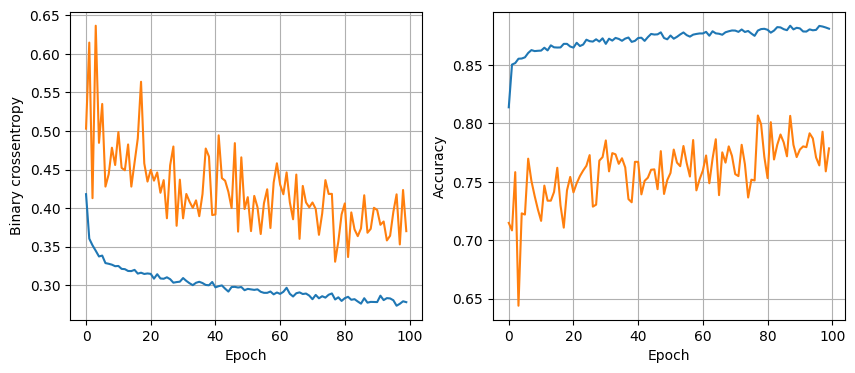

119/119 [==============================] - 0s 2ms/step - loss: 0.3003 - accuracy: 0.8843
64 nodes, dropout 0.2, lr 0.005, batch size 32


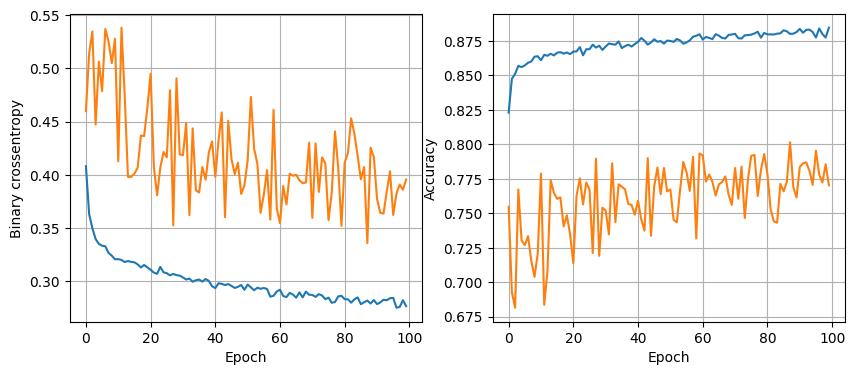

119/119 [==============================] - 0s 2ms/step - loss: 0.3040 - accuracy: 0.8772
64 nodes, dropout 0.2, lr 0.005, batch size 64


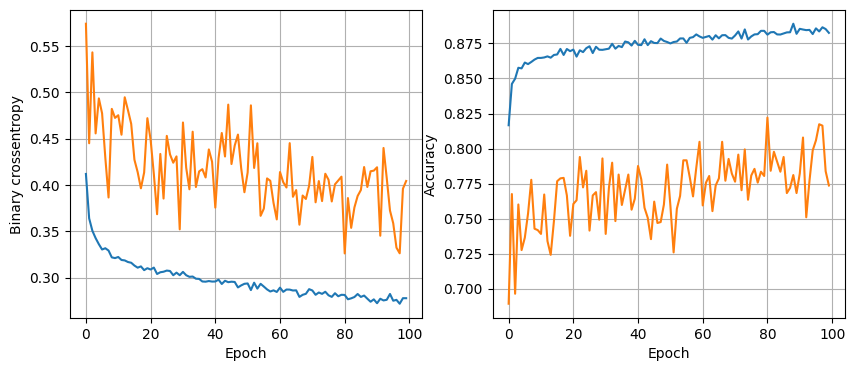

119/119 [==============================] - 0s 3ms/step - loss: 0.3054 - accuracy: 0.8754
64 nodes, dropout 0.2, lr 0.005, batch size 128


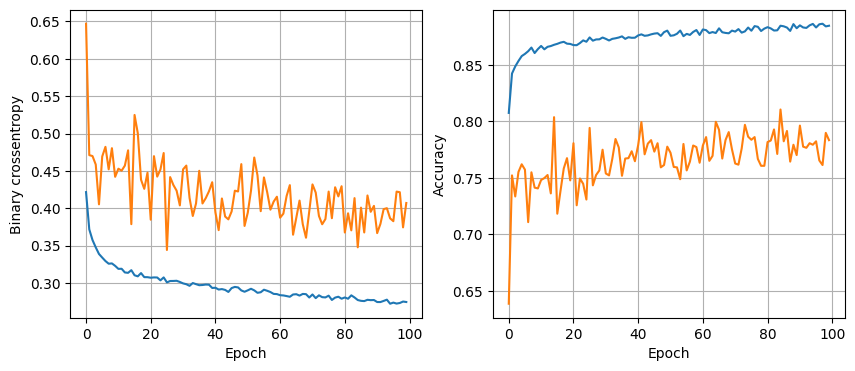

119/119 [==============================] - 0s 2ms/step - loss: 0.3021 - accuracy: 0.8820
64 nodes, dropout 0.2, lr 0.001, batch size 32


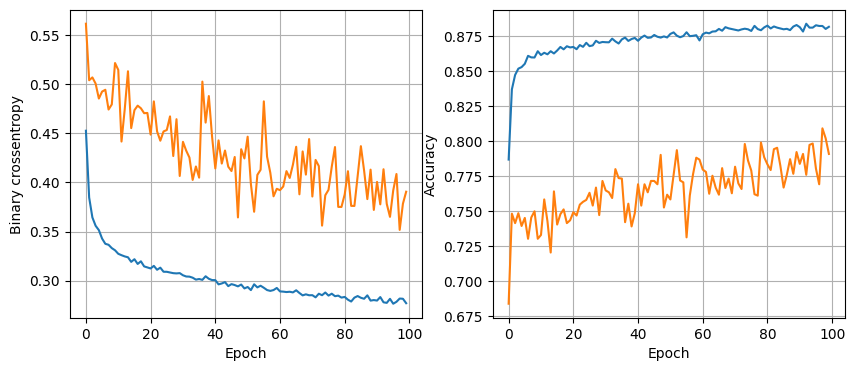

119/119 [==============================] - 0s 3ms/step - loss: 0.2972 - accuracy: 0.8778
64 nodes, dropout 0.2, lr 0.001, batch size 64


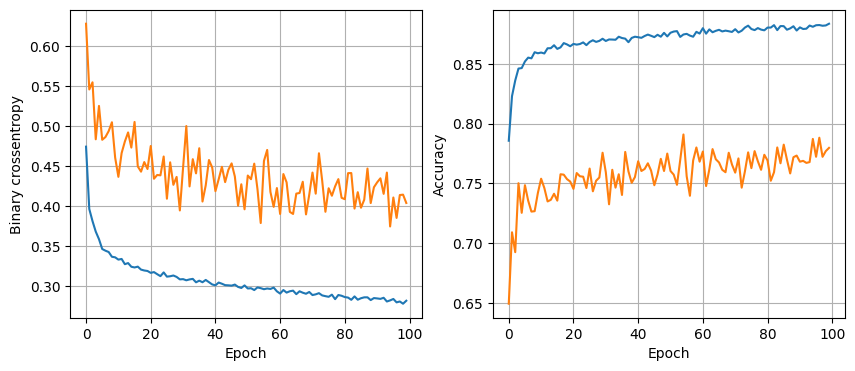

119/119 [==============================] - 0s 2ms/step - loss: 0.2966 - accuracy: 0.8793
64 nodes, dropout 0.2, lr 0.001, batch size 128


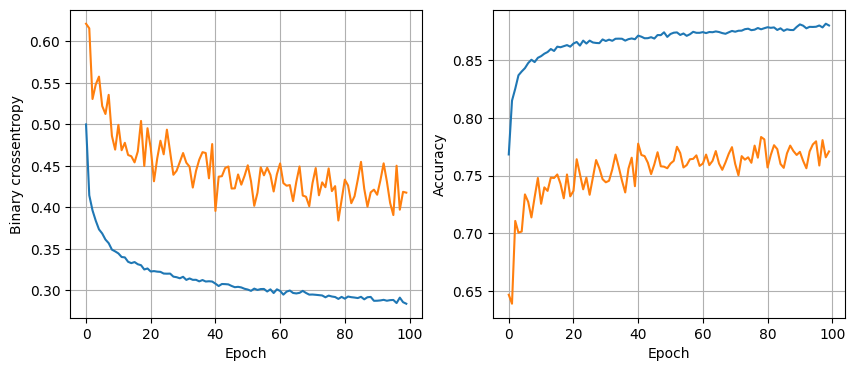

119/119 [==============================] - 0s 2ms/step - loss: 0.3028 - accuracy: 0.8767


In [22]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [23]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 1ms/step


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1316
           1       0.88      0.94      0.91      2488

    accuracy                           0.88      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

